# 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

- 비용함수는 학습 데이터의 잔차 오류값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균현을 이뤄야 한다.
- 비용 함수 목표 = Min(RSS(W) + alpha * ||W||22)
    - alpha값을 크게하면 비용함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있고,
    - alpha값을 작게하면 회귀 계수 W의 값이 커져도 어느 정도 상쇄가 가능하므로 학습 데이터 적합을 더 개선할 수 있다.
    - 즉, alpha를 0에서부터 지속적으로 값을 증가시키면 회귀 계수 값의 크기를 감소시킬 수 있다.
    - 이처럼 비용함수에 alpha값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제(Regularization)라고 부른다.
    - 규제는 크게 L2방식과 L1방식으로 구분된다.
- L2규제는 W의 제곱에 대해 페널티를 부여하는 방식이다.
    - L2규제를 적용한 회귀를 릿지(Ridge)회귀라고 한다.
- L1규제 W의 절대값에 대해 페널티를 부여하는 방식이다.
    - L1규제를 적용한 회귀를 라쏘(Lasso)회귀라고 한다.

## 릿지 회귀
- 보스턴 주택가격 ridge회귀로 다시 예측해보고 예측 성능을 cross_val_score로 평가

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target # boston데이터셋의 target 배열은 주택가격
df = bostonDF

In [3]:
# feature, target 데이터 분리
y_target = df['PRICE'] # 레이블(종속변수)
X_data = df.drop(['PRICE'], axis=1, inplace=False) # 피처(독립변수)

In [4]:
X_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 flods 의 개별 Negative MSE scores:', np.round(neg_mse_scores,3))
print('5 flods 의 개별 RMSE scores:', np.round(rmse_scores,3))
print('5 flods 의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 flods 의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 flods 의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 flods 의 평균 RMSE: 5.518


- 릿지의 5개 폴드 세트의 평균 RMSE가 5.518 인것을 확인했다.
- 앞 예제의 규제가 없는 LinearRegression의 RMSE 평균인 5.829보다 더 뛰어난 예측 성능을 보여준다.

### 릿지의 alpha값을 0, 0.1, 1, 10, 100으로 변환시키면서 RMSE와 회귀 계수 값의 변화 확인하기

In [6]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균rmse 구하기
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    # cross_val_score를 이용해 5폴드의 평균 rmse를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    
    print('alpha {0}일때 5 folds의 평균 RMSE : {1:.3f}' .format(alpha, avg_rmse))

alpha 0일때 5 folds의 평균 RMSE : 5.829
alpha 0.1일때 5 folds의 평균 RMSE : 5.788
alpha 1일때 5 folds의 평균 RMSE : 5.653
alpha 10일때 5 folds의 평균 RMSE : 5.518
alpha 100일때 5 folds의 평균 RMSE : 5.330


- alpha가 100일때 평균 RMSE가 5.330으로 가장 좋다. 

### alpha값의 변화에 따른 피처의 회귀 계수 값을 가로 막대 그래프로 시각화

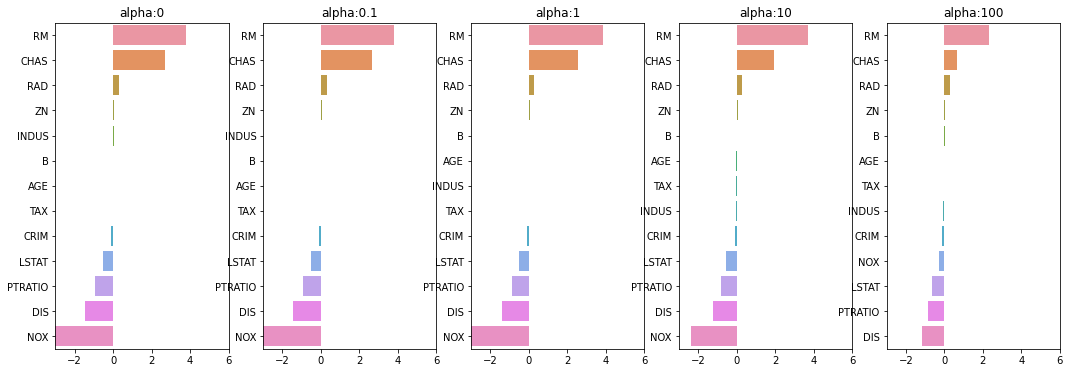

In [7]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrmae생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
# for문 밖에서 맷플롯립의 show호출 및 alpha에 따른 피처별 회귀 계수를 DataFrmae으로 표시
plt.show()

- alpha 값을 증가시킬수록 회귀 계수 값은 지속적으로 작아짐을 알 수 있다.
- 특히 NOX 피처의 경우 alpha 값을 계속 증가시킴에 따라 회귀 계수가 크게 작아지고 있다.

In [34]:
# DataFrame에 저장된 alpha값의 변화에 따른 ridge 회귀계수 값 구하기
ridge_alphas = [0,0.1,1,10,100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


<AxesSubplot:>

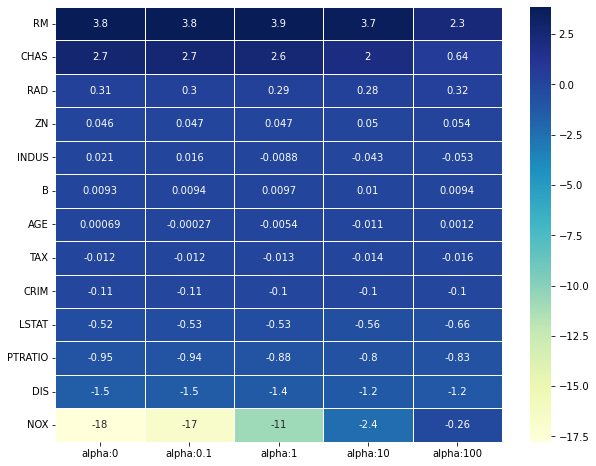

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(coeff_df.sort_values(by=sort_column, ascending=False), annot=True, linewidths=.5, cmap='YlGnBu')

## 라쏘 회귀
- W의 절대값에 페널티를 부여하는 L1규제를 선형 회귀에 적용한 것이 라쏘회귀이다.
- Lasso클래스의 주요 생성 파라미터는 alpha이며, 이는 라쏘 회귀의 alpha L1규제 계수에 해당한다.

### get_linear_reg_eval() 함수 구현

In [9]:
from sklearn.linear_model import Lasso, ElasticNet

In [13]:
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE 출력, 회귀 계수값 DF로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

## alpha값 변화에 따른 RMSE와 회귀계수 출력

In [31]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [32]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


- alpha 값이 증가함에 따라 일부 feature의 회귀 계수는 0으로 바뀌는 것을 볼 수 있다. 이렇게 회귀 계수가 0인 feature가 회귀 식에서 제외되면서 L1 규제를 이용하여 feature 선택의 효과를 얻을 수 있다.

<AxesSubplot:>

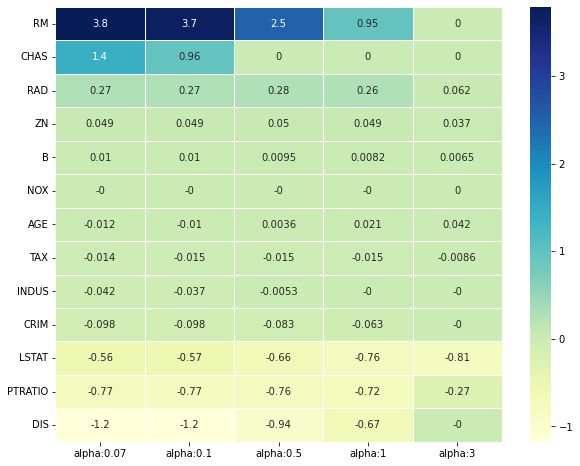

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(coeff_lasso_df.sort_values(by=sort_column, ascending=False), annot=True, linewidths=.5, cmap='YlGnBu')

## 엘라스틱넷
- 엘라스틱넷(Elastic Net) 회귀는 L2 규제와 L1 규제를 결합한 회귀이다.
- 라쏘 회귀는 서로 상관관계가 높은 feature들 중에서 중요 feature 만을 셀렉션하고 다른 feature들은 모두 회귀 계수를 0으로 만드는 성향이 강하다. 특히 이러한 성향으로 인해 alpha 값에 따라 회귀 계수의 값이 급격히 변동할 수도 있다. 엘라스틱넷 회귀는 이러한 점을 완화하기 위해 L2 규제를 라쏘 회귀에 추가한 것이다.
- 반대로 엘라스틱넷 회귀의 단점은 L1과 L2 규제가 결합된 규제로 인해 수행시간이 상대적으로 오래 걸리는 것이다.

- 사이킷런은 ElasticNet 클래스를 통해 엘라스틱넷 회귀를 구현할 수 있고, 주요 생성 파라미터는 alpha와 l1_ratio이다. alpha는 Ridge와 Lasso 클래스의 alpha와는 다르다. 엘라스틱넷의 규제는 aL1 + bL2로 정의할 수 있는데 여기서 alpha는 a+b이다.
- 그리고 l1_ratio는 a/(a+b)이다. l1_ratio가 0이면 a가 0이 되므로 L2 규제과 같고, l1_ratio가 1이면 b가 0이므로 L1 규제와 같다.

In [25]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


<AxesSubplot:>

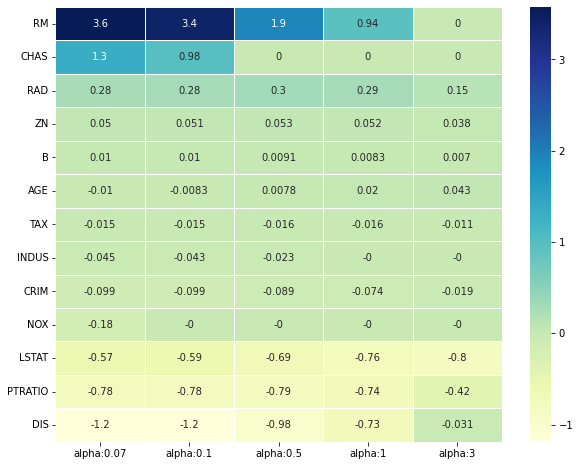

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(coeff_elastic_df.sort_values(by=sort_column, ascending=False), annot=True, linewidths=.5, cmap='YlGnBu')

- l1_ratio는 0.7로 고정하고 alpha에 따라 어떻게 변화하는지 살펴보았다. alpha가 0.5일 때 RMSE가 5.468로 가장 좋은 예측 성능을 보이고, 이전의 라쏘보다는 상대적으로 0이 되는 값이 적다는 것을 알 수 있다

## 선형회귀 모델을 위한 데이터 변환

- 선형회귀 모델은 피처값과 타깃값의 분포가 정규분포형태를 매우 선호 한다. 특히 타깃값(y)의 경우 정규분포가 아니라 특정값의 분포가 치우친 왜곡(skew)된 형태의 분포도일 경우 예측성능에 부정적인 영향을 미칠 가능성이 높다.
- 선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행하는 것이 일반적이다.
- feature dataset (x)
    - 1. StandardScaler 클래스를 이용해 평균 0, 분산 1인 표준 정규분포를 가진 데이터 세트로 변환
     - 2.  MinMaxScaler 클래스를 이용해 최솟값이 0이고, 최댓값이 1인 값으로 정규화를 수행
    - 3.  스케일링/정규화를 수행한 데이터 셋에 다시 다항 특성을 적용하여 변환(1,2번으로 예측성능이 안되면 사용)
    - 4.  로그 변환(Log Transformation) : 원래 값에 log 함수를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포하게 된다. 
    - 5.  categorical variable은 label encoding이 아닌 one-hot encoding 수행
- target dataset (y)
    - 일반적으로 로그 변환을 사용

### 정규분포 변환, 최댓값/최솟값 정규화, 로그변환을 적용

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [18]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)

(506, 13) (506, 13)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 
(506, 13) (506, 13)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 
(506, 104) (506, 13)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 
(506, 13) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 
(506, 104) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMS